<a href="https://colab.research.google.com/github/ashish620-boogle/Fake_News_Identification/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection 
The aim of this module is to create an artificial neural network for classifying a news into agreeable, disagreeable, unrelatable and discussable.

In this module we will use the `FNC-1 Dataset`. The model we will be using will be from the research paper: [On the Benefit of Combining Neural, Statistical and External Features for Fake News Identification](https://arxiv.org/abs/1712.03935). 

## Dataset
[FNC-1 Dataset](https://github.com/FakeNewsChallenge/fnc-1)

## Stance Detection dataset for FNC-1

For details of the task, see [FakeNewsChallenge.org](http://fakenewschallenge.org)


The data provided is `(headline, body, stance)` instances, where `stance` is one of `{unrelated, discuss, agree, disagree}`. The dataset is provided as two CSVs:


#### `train_bodies.csv`

This file contains the body text of articles (the `articleBody` column) with corresponding IDs (`Body ID`)

#### `train_stances.csv`

This file contains the labeled stances (the `Stance` column) for pairs of article headlines (`Headline`) and article bodies (`Body ID`, referring to entries in `train_bodies.csv`).

#### Distribution of the data

The distribution of `Stance` classes in `train_stances.csv` is as follows:

|   rows |   unrelated |   discuss |     agree |   disagree |
|-------:|------------:|----------:|----------:|-----------:|
|  49972 |    0.73131  |  0.17828  | 0.0736012 |  0.0168094 |

Credits:

- Edward Misback
- Craig Pfeifer

In [ ]:
!nvidia-smi

Sat Oct 15 10:51:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Getting our data ready

In [ ]:
!mkdir train_data
!mkdir test_data
!wget https://raw.githubusercontent.com/ashish620-boogle/Fake_News_detection/master/train_bodies.csv
!wget https://raw.githubusercontent.com/ashish620-boogle/Fake_News_detection/master/train_stances.csv
!wget https://raw.githubusercontent.com/ashish620-boogle/Fake_News_detection/master/test_bodies.csv
!wget https://raw.githubusercontent.com/ashish620-boogle/Fake_News_detection/master/test_stances_unlabeled.csv
!mv test_bodies.csv test_data
!mv train_bodies.csv train_data
!mv train_stances.csv train_data
!mv test_stances_unlabeled.csv test_data

In [ ]:
import pandas as pd
df1 = pd.read_csv('train_data/train_bodies.csv')
df2 = pd.read_csv('train_data/train_stances.csv')
df1.columns = df1.columns.str.replace(' ','_')
df2.columns = df2.columns.str.replace(' ','_')

In [ ]:
df1

,Body_ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...
...,...,...
1678,2528,Intelligence agencies hunting for identity of ...
1679,2529,"While Daleks ""know no fear"" and ""must not fear..."
1680,2530,More than 200 schoolgirls were kidnapped in Ap...
1681,2531,A Guantanamo Bay prisoner released last year a...


In [ ]:
df2

,Headline,Body_ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree
...,...,...,...
49967,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,1681,unrelated
49968,Brian Williams slams social media for speculat...,2419,unrelated
49969,Mexico Says Missing Students Not Found In Firs...,1156,agree
49970,US Lawmaker: Ten ISIS Fighters Have Been Appre...,1012,discuss


In [ ]:
df = df2.join(df1.set_index('Body_ID'), on='Body_ID')
df

,Headline,Body_ID,Stance,articleBody
0,Police find mass graves with at least '15 bodi...,712,unrelated,Danny Boyle is directing the untitled film\n\n...
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree,Hundreds of Palestinians were evacuated from t...
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated,30-year-old Moscow resident was hospitalized w...
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated,(Reuters) - A Canadian soldier was shot at the...
4,Spider burrowed through tourist's stomach and ...,1923,disagree,"Fear not arachnophobes, the story of Bunbury's..."
...,...,...,...,...
49967,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,1681,unrelated,(CNN) -- Boko Haram laughed off Nigeria's anno...
49968,Brian Williams slams social media for speculat...,2419,unrelated,Along with unveiling the Apple Watch earlier t...
49969,Mexico Says Missing Students Not Found In Firs...,1156,agree,The bodies found in a mass grave were confirme...
49970,US Lawmaker: Ten ISIS Fighters Have Been Appre...,1012,discuss,Rep. Duncan Hunter (R-CA) told Greta Van Suste...


```
Taking 0.004% dataset
```

In [ ]:
dfN = pd.DataFrame()
for name, group in df.groupby(by=["Stance"]):
  group = group[:50]
  df1 = df.iloc[group.index]
  dfN = dfN.append(df1, ignore_index=True)
dfN

,Headline,Body_ID,Stance,articleBody
0,Hundreds of Palestinians flee floods in Gaza a...,158,agree,Hundreds of Palestinians were evacuated from t...
1,'Nasa Confirms Earth Will Experience 6 Days of...,154,agree,Thousands of people have been duped by a fake ...
2,Banksy 'Arrested & Real Identity Revealed' Is ...,1739,agree,If you’ve seen a story floating around on your...
3,Woman detained in Lebanon is not al-Baghdadi's...,1468,agree,An Iraqi official denied that a woman detained...
4,"No, Robert Plant Didn’t Rip Up an $800 Million...",295,agree,Led Zeppelin fans will be disappointed to lear...
...,...,...,...,...
195,Did Kim Yo-Jong Take Kim Jong Un’s Role? North...,1500,unrelated,Tonight — finally! — ESPN is going to have an ...
196,US confirms death of Somalia terror group leader,167,unrelated,"LAS VEGAS -- The person behind the $300,000 di..."
197,Durex Is Not Making Pumpkin Spice Condoms Afte...,1175,unrelated,A spokesman for the Iraqi health ministry deni...
198,ISLAMIC STATE BEHEADS MISSING AMERICAN JOURNAL...,1034,unrelated,(Reuters) - A Canadian soldier was shot at the...


In [ ]:
df_store = df
df = dfN.sample(frac=1).reset_index(drop=True)
df

,Headline,Body_ID,Stance,articleBody
0,Shots Heard In Alleged Brown Shooting Recordin...,1818,discuss,Video messaging app Glide on Thursday said it ...
1,Who Is Michael Zehaf-Bibeau? Ottawa Shooter Su...,1251,unrelated,The lethal animals are being launched at Iraqi...
2,Man who skipped work for 24 years is finally f...,1951,agree,An executive engineer at the Central Public Wo...
3,Islamic State militants allegedly used chlorin...,1590,discuss,BAGHDAD / Nina /--Vice President Osama Nujaifi...
4,Fisherman lands 19 STONE catfish which could b...,2161,agree,"Dino Ferrari hooked the whopper wels catfish, ..."
...,...,...,...,...
195,Bali Awry,181,unrelated,While Apple announced that the base model of i...
196,Boko Haram ceasefire ignored as violence flare...,2139,disagree,"MAIDUGURI, Nigeria — The leader of Nigeria’s I..."
197,N. Korea’s Kim has leg injury but in control,570,unrelated,"You want a gold Apple Watch, you say? Then it'..."
198,Cold Turkey,1949,agree,"There it was in the middle of a field, baking ..."


In [ ]:
df.isnull().sum()

Headline       0
Body_ID        0
Stance         0
articleBody    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     200 non-null    object
 1   Body_ID      200 non-null    int64 
 2   Stance       200 non-null    object
 3   articleBody  200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


In [ ]:
df.drop('Body_ID', inplace=True, axis=1)
df

,Headline,Stance,articleBody
0,Shots Heard In Alleged Brown Shooting Recordin...,discuss,Video messaging app Glide on Thursday said it ...
1,Who Is Michael Zehaf-Bibeau? Ottawa Shooter Su...,unrelated,The lethal animals are being launched at Iraqi...
2,Man who skipped work for 24 years is finally f...,agree,An executive engineer at the Central Public Wo...
3,Islamic State militants allegedly used chlorin...,discuss,BAGHDAD / Nina /--Vice President Osama Nujaifi...
4,Fisherman lands 19 STONE catfish which could b...,agree,"Dino Ferrari hooked the whopper wels catfish, ..."
...,...,...,...
195,Bali Awry,unrelated,While Apple announced that the base model of i...
196,Boko Haram ceasefire ignored as violence flare...,disagree,"MAIDUGURI, Nigeria — The leader of Nigeria’s I..."
197,N. Korea’s Kim has leg injury but in control,unrelated,"You want a gold Apple Watch, you say? Then it'..."
198,Cold Turkey,agree,"There it was in the middle of a field, baking ..."


In [ ]:
X_train = df.drop('Stance', axis=1)
y_train = df["Stance"]
X_train.head(), y_train.head()

(                                            Headline  \
 0  Shots Heard In Alleged Brown Shooting Recordin...   
 1  Who Is Michael Zehaf-Bibeau? Ottawa Shooter Su...   
 2  Man who skipped work for 24 years is finally f...   
 3  Islamic State militants allegedly used chlorin...   
 4  Fisherman lands 19 STONE catfish which could b...   
 
                                          articleBody  
 0  Video messaging app Glide on Thursday said it ...  
 1  The lethal animals are being launched at Iraqi...  
 2  An executive engineer at the Central Public Wo...  
 3  BAGHDAD / Nina /--Vice President Osama Nujaifi...  
 4  Dino Ferrari hooked the whopper wels catfish, ...  , 0      discuss
 1    unrelated
 2        agree
 3      discuss
 4        agree
 Name: Stance, dtype: object)

In [ ]:
max(len(art) for art in df['Headline'])

182

## Featuring the dataset

## Neural Embeddings
### For Skip-Thought Vector Embeddings

In [ ]:
!wget http://www.cs.toronto.edu/~rkiros/models/dictionary.txt
!wget http://www.cs.toronto.edu/~rkiros/models/utable.npy
!wget http://www.cs.toronto.edu/~rkiros/models/btable.npy
!wget http://www.cs.toronto.edu/~rkiros/models/uni_skip.npz
!wget http://www.cs.toronto.edu/~rkiros/models/uni_skip.npz.pkl
!wget http://www.cs.toronto.edu/~rkiros/models/bi_skip.npz
!wget http://www.cs.toronto.edu/~rkiros/models/bi_skip.npz.pkl
!git clone https://github.com/ashish620-boogle/skip-thoughts.git
!mv skip-thoughts/ skipThoughts

In [ ]:
!mkdir u
!mkdir u/rkiros
!mkdir u/rkiros/public_html
!mkdir u/rkiros/public_html/models
!mv uni_skip.npz.pkl u/rkiros/public_html/models/
!mv bi_skip.npz.pkl u/rkiros/public_html/models/
!mv u /
!mv uni_skip.npz /u/rkiros/public_html/models/
!mv bi_skip.npz /u/rkiros/public_html/models/
!mv utable.npy /u/rkiros/public_html/models/
!mv btable.npy /u/rkiros/public_html/models/
!mv dictionary.txt /u/rkiros/public_html/models/

In [ ]:
!pip install ntlk
!pip install theano

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement ntlk (from versions: none)
ERROR: No matching distribution found for ntlk
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import sys
while(sys.path[0]=='skipThoughts'):
  sys.path.remove('skipThoughts')
sys.path.insert(0, '/content/skipThoughts')
import skipthoughts
# my_model_skip_thoughts = skipthoughts.load_model()
# encoder = skipthoughts.Encoder(my_model_skip_thoughts)
# skip_thought_vectors_headline = encoder.encode(X_train['Headline'])
# vectors_body = encoder.encode(X_train['articleBody'])

## Stastical Features
### 1-gram TF for Headline and Body

This is to create stastical feature of our neural network. We will take the array as an input and get a vector of dimension 5000 each for body and headline. The array will represent the frequency of each term in the sentence or article.

In [ ]:
import numpy as np
import tensorflow as tf
import re
from sklearn.feature_extraction.text import TfidfVectorizer

N_GRAM = 1
def string_preprocess(xs):
  xs = str(xs)
  xs = re.sub(r'[^a-zA-Z]+', ' ', xs)
  xs = re.sub('\ \ ', ' ', xs)
  return xs

## External Features


### Sentiment analysis feature vector (4+4)

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_vader(sentence):

    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = 2

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = 0

    else :
        overall_sentiment = 1
  
    return overall_sentiment

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import sent_tokenize
sid = SentimentIntensityAnalyzer()
def compute_sentiment(sentences):
            result = []
            for sentence in sentences:
                vs = sid.polarity_scores(sentence)
                result.append(vs)
            return pd.DataFrame(result).mean()
# df['headline_sents'] = df['Headline'].apply(lambda x: sent_tokenize(x))
# df = pd.concat([df, df['headline_sents'].apply(lambda x: compute_sentiment(x))], axis=1)
# df.rename(columns={'compound':'h_compound', 'neg':'h_neg', 'neu':'h_neu', 'pos':'h_pos'}, inplace=True)
# df['body_sents'] = df['articleBody'].apply(lambda x: sent_tokenize(x))
# df = pd.concat([df, df['body_sents'].apply(lambda x: compute_sentiment(x))], axis=1)
# df.rename(columns={'compound':'b_compound', 'neg':'b_neg', 'neu':'b_neu', 'pos':'b_pos'}, inplace=True)
# df

### Tf-idf score between headline and its body

In [ ]:
# importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
import pandas as pd
import numpy as np

## Converting 3D array of array into 1D array
def arr_convert_1d(arr):
	arr = np.array(arr)
	arr = np.concatenate( arr, axis=0 )
	arr = np.concatenate( arr, axis=0 )
	return arr

## Cosine Similarity
cos = []
def cosine(trans):
	cos.append(cosine_similarity(trans[0], trans[1]))

## Manhattan Distance
manhatten = []
def manhatten_distance(trans):
	manhatten.append(pairwise_distances(trans[0], trans[1],
										metric = 'manhattan'))

## Euclidean Distance
euclidean = []
def euclidean_function(vectors):
	euc=euclidean_distances(vectors[0], vectors[1])
	euclidean.append(euc)

# This Function finds the similarity between two
# sentences by using above functions.

## TF - IDF
def tfidf(str1, str2):
	vect = TfidfVectorizer()
	# Fit the your whole dataset. After all, this'll
	# produce the vectors which is based on words in corpus/dataset
	vect.fit(X_train['articleBody'])

	corpus = [str1,str2]
	trans = vect.transform(corpus)

	euclidean_function(trans)
	cosine(trans)
	manhatten_distance(trans)
	return convert()

def convert():
	dataf = {}
	lis2 = arr_convert_1d(manhatten)
	dataf['manhatten'] = lis2
	lis2 = arr_convert_1d(cos)
	dataf['cos_sim'] = lis2
	lis2 = arr_convert_1d(euclidean)
	dataf['euclidean'] = lis2
	return dataf

# newData = {'manhatten':np.array([]), 'cos_sim':np.array([]), 'euclidean':np.array([])}
# str1 = X_train['Headline']
# str2 = X_train['articleBody']
# for i,j in zip(str1,str2):
#   newData['manhatten'] = np.append(newData['manhatten'],np.average(tfidf(i,j)['manhatten']))
#   newData['cos_sim'] = np.append(newData['cos_sim'],np.average(tfidf(i,j)['cos_sim']))
#   newData['euclidean'] = np.append(newData['euclidean'],np.average(tfidf(i,j)['euclidean']))
# newData['manhatten']/=newData['manhatten'].max()
# newData['cos_sim']/=newData['cos_sim'].max()
# newData['euclidean']/=newData['euclidean'].max()
# X_train['manhatten'] = newData['manhatten']
# X_train['cos_sim'] = newData['cos_sim']
# X_train['euclidean'] = newData['euclidean']
# X_train

### N-gram characters count
### N-gram words count

In [ ]:
import re
from nltk.util import ngrams

def generate_ngrams_sentences(n, s):
  s = str(s)
  s = s.lower()
  s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
  tokens = [token for token in s.split(" ") if token != ""]
  output = list(ngrams(tokens, n))
  return output

def generate_ngrams_words(n, s):
  s = str(s)
  s = s.lower()
  s = re.sub(r'[^a-zA-Z0-9\s]', '', s)
  s = s.replace(' ', '')
  y= [ ]
  for x in range(len(s)):
    b = s[x:x+n]
    if(len(b)<n):
      break
    y.append(b)
  return y

In [ ]:
def num_of_matches(dicti, dict1):
  count = 0
  for x,y in zip(dicti.values(), dict1.values()):
      count += len(list(set(x).intersection(y)))
  return count

## Model

**These are the functions.**
```
Give them pandas dataframe containing headline and body. 
Once, run all three first with the training sample with ld_model=True. 
Delete the output if the memory is full all we need is encoder of neural_embed_model() and vectorizer and vectorizer_1 of stastical_features(). 
Pass the real world sample to the functions with ld_model=False.
Save the values returned by each of the three functions.
```

In [ ]:
def neural_embed_model(sample_, ld_model=True):
  if ld_model: 
    my_model_skip_thoughts = skipthoughts.load_model()
    encoder = skipthoughts.Encoder(my_model_skip_thoughts)
  skip_thought_vectors_headline = encoder.encode(sample_['Headline'])
  vectors_body = encoder.encode(sample_['articleBody'])
  feat1 = np.array(skip_thought_vectors_headline * vectors_body, dtype=np.float64)
  feat2 = np.array(abs(vectors_body - skip_thought_vectors_headline), dtype= np.float64)
  feat1_ = np.concatenate((feat1,feat2),axis=1)
 
  return feat1_



def external_features(sample_):

  # Sentiment analysis
  sample_['headline_sents'] = sample_['Headline'].apply(lambda x: sent_tokenize(x))
  sample_ = pd.concat([sample_, sample_['headline_sents'].apply(lambda x: compute_sentiment(x))], axis=1)
  sample_.rename(columns={'compound':'h_compound', 'neg':'h_neg', 'neu':'h_neu', 'pos':'h_pos'}, inplace=True)
  sample_['body_sents'] = sample_['articleBody'].apply(lambda x: sent_tokenize(x))
  sample_ = pd.concat([sample_, sample_['body_sents'].apply(lambda x: compute_sentiment(x))], axis=1)
  sample_.rename(columns={'compound':'b_compound', 'neg':'b_neg', 'neu':'b_neu', 'pos':'b_pos'}, inplace=True)

  # Tf-idf score
  newData = {'manhatten':np.array([]), 'cos_sim':np.array([]), 'euclidean':np.array([])}
  str1 = sample_['Headline']
  str2 = sample_['articleBody']
  for i,j in zip(str1,str2):
    newData['manhatten'] = np.append(newData['manhatten'],np.average(tfidf(i,j)['manhatten']))
    newData['cos_sim'] = np.append(newData['cos_sim'],np.average(tfidf(i,j)['cos_sim']))
    newData['euclidean'] = np.append(newData['euclidean'],np.average(tfidf(i,j)['euclidean']))
  newData['manhatten']/=newData['manhatten'].max()
  newData['cos_sim']/=newData['cos_sim'].max()
  newData['euclidean']/=newData['euclidean'].max()
  sample_['manhatten'] = newData['manhatten']
  sample_['cos_sim'] = newData['cos_sim']
  sample_['euclidean'] = newData['euclidean']

  # n-gram word match
  n_gram_word_body = []
  n_gram_word_headline = []
  for s in sample_['Headline']:
    n_gram_word_headline.append([dict(zip([x],[ngrams(s.lower(), x)])) for x in range(2,17)])
  for s in sample_['articleBody']:
    n_gram_word_body.append([dict(zip([x],[ngrams(s.lower(), x)])) for x in range(2,17)])

  input_3_1 = []
  for i in range(len(n_gram_word_body)):
    input_3_1.append(list(num_of_matches(b,a) for a,b in zip(n_gram_word_body[i], n_gram_word_headline[i])))
  input_3_1 = np.array(input_3_1)

  feat = ['bi-gram', 'tri-gram', 'quad-gram', 'pent-gram', 'hex-gram', 'sept-gram', 'oct-gram', 'non-gram', 'dec-gram', '11-gram', '12-gram', '13-gram', '14-gram', '15-gram', '16-gram']
  for ind,features in enumerate(feat):
    sample_[features] = input_3_1[:,ind]
  
  # n-gram sentence match
  n_gram_body = []
  n_gram_headline = []
  for s in sample_['Headline']:
    n_gram_headline.append([dict(zip([x],[ngrams(s.lower().split(), x)])) for x in range(2,7)])
  for s in sample_['articleBody']:
    n_gram_body.append([dict(zip([x],[ngrams(s.lower().split(), x)])) for x in range(2,7)])
  
  input_3_1 = []
  for i in range(len(n_gram_body)):
    input_3_1.append(list(num_of_matches(b,a) for a,b in zip(n_gram_body[i], n_gram_headline[i])))
  input_3_1 = np.array(input_3_1)

  feat = ['bi-gram', 'tri-gram', 'quad-gram', 'pent-gram', 'hex-gram']
  for ind,features in enumerate(feat):
    sample_[str(features+"-sent")] = input_3_1[:,ind]

  feat1_ = np.array(sample_.drop(columns=['Headline', 'articleBody', 'body_sents', 'headline_sents'], axis=1), dtype=np.float32)

 
  return feat1_



def stastical_features(sample_, ld_model=True):

  N_GRAM = 1
  for x in sample_['Headline']:
    xs = string_preprocess(x)
    sample_['Headline'].loc[sample_['Headline']==x] = xs

  for x in sample_['articleBody']:
    xs = string_preprocess(x)
    sample_['articleBody'].loc[sample_['articleBody']==x] = xs

  if ld_model:
    vectorizer = TfidfVectorizer(ngram_range=(N_GRAM, N_GRAM))
  TF_Vect_headline = vectorizer.fit_transform(sample_['Headline'])
  if ld_model:
    vectorizer_1 = TfidfVectorizer(ngram_range=(N_GRAM, N_GRAM), max_features=10000-TF_Vect_headline.shape[1])
  TF_Vect_body = vectorizer_1.fit_transform(sample_['articleBody'] )
  feat1_ = np.concatenate((np.array(TF_Vect_headline.toarray()),np.array(TF_Vect_body.toarray())),axis = 1)

  return feat1_

In [ ]:
def final_model(sB=(10000,)):
  inputA = tf.keras.Input(shape=(9600,))
  inputB = tf.keras.Input(shape=sB)
  inputC = tf.keras.Input(shape=(31,))

  # NE
  x = tf.keras.layers.Dense(500)(inputA)
  x = tf.keras.layers.Dropout(0.5)(x)
  x = tf.keras.layers.ActivityRegularization(l2=0.00000001)(x)
  x = tf.keras.layers.Activation('sigmoid')(x)
  x = tf.keras.layers.Dense(100)(x)
  outputA = tf.keras.layers.Activation('sigmoid')(x)

  # EF
  y = tf.keras.layers.Dense(50)(inputC)
  outputC = tf.keras.layers.Activation('relu')(y)

  # SF
  z = tf.keras.layers.Dense(500)(inputB)
  z = tf.keras.layers.Dropout(0.4)(z)
  z = tf.keras.layers.ActivityRegularization(l2=0.00005)(z)
  z = tf.keras.layers.Activation('relu')(z)
  z = tf.keras.layers.Dense(50)(z)
  outputB = tf.keras.layers.Activation('relu')(z)

  ff = tf.keras.layers.Concatenate()([outputA, outputB, outputC])
  ff = tf.keras.layers.BatchNormalization()(ff)
  ff = tf.keras.layers.Dense(4)(ff)
  outputs = tf.keras.layers.Activation('softmax')(ff)

  return tf.keras.Model(inputs=[inputA, inputB, inputC], outputs=outputs, name='FNC_Model')

In [ ]:
exff = external_features(X_train)
exff[0]

array([ 0.0000000e+00,  1.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        2.2222223e-02,  9.4633335e-01,  3.1444445e-02, -5.1555554e-03,
        9.3480796e-01,  8.0163395e-01,  9.4632089e-01,  3.9000000e+01,
        3.8000000e+01,  2.8000000e+01,  2.1000000e+01,  1.5000000e+01,
        1.0000000e+01,  7.0000000e+00,  5.0000000e+00,  3.0000000e+00,
        1.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  1.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

In [ ]:
stff = stastical_features(X_train)
stff.shape

(200, 9299)

In [ ]:
stff.shape[1]

9299

In [ ]:
model = final_model(sB=(stff.shape[1],))

In [ ]:
model.summary()

Model: "FNC_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 9600)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 9299)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 500)          4800500     ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 500)          4650000     ['input_2[0][0]']                
                                                                                          

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
y_train_copy = y_train

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(y_train).reshape(-1, 1))
enc.categories_

[array(['agree', 'disagree', 'discuss', 'unrelated'], dtype=object)]

In [ ]:
y_train = enc.transform(np.array(y_train).reshape(-1,1)).toarray()

In [ ]:
y_train.shape

(200, 4)

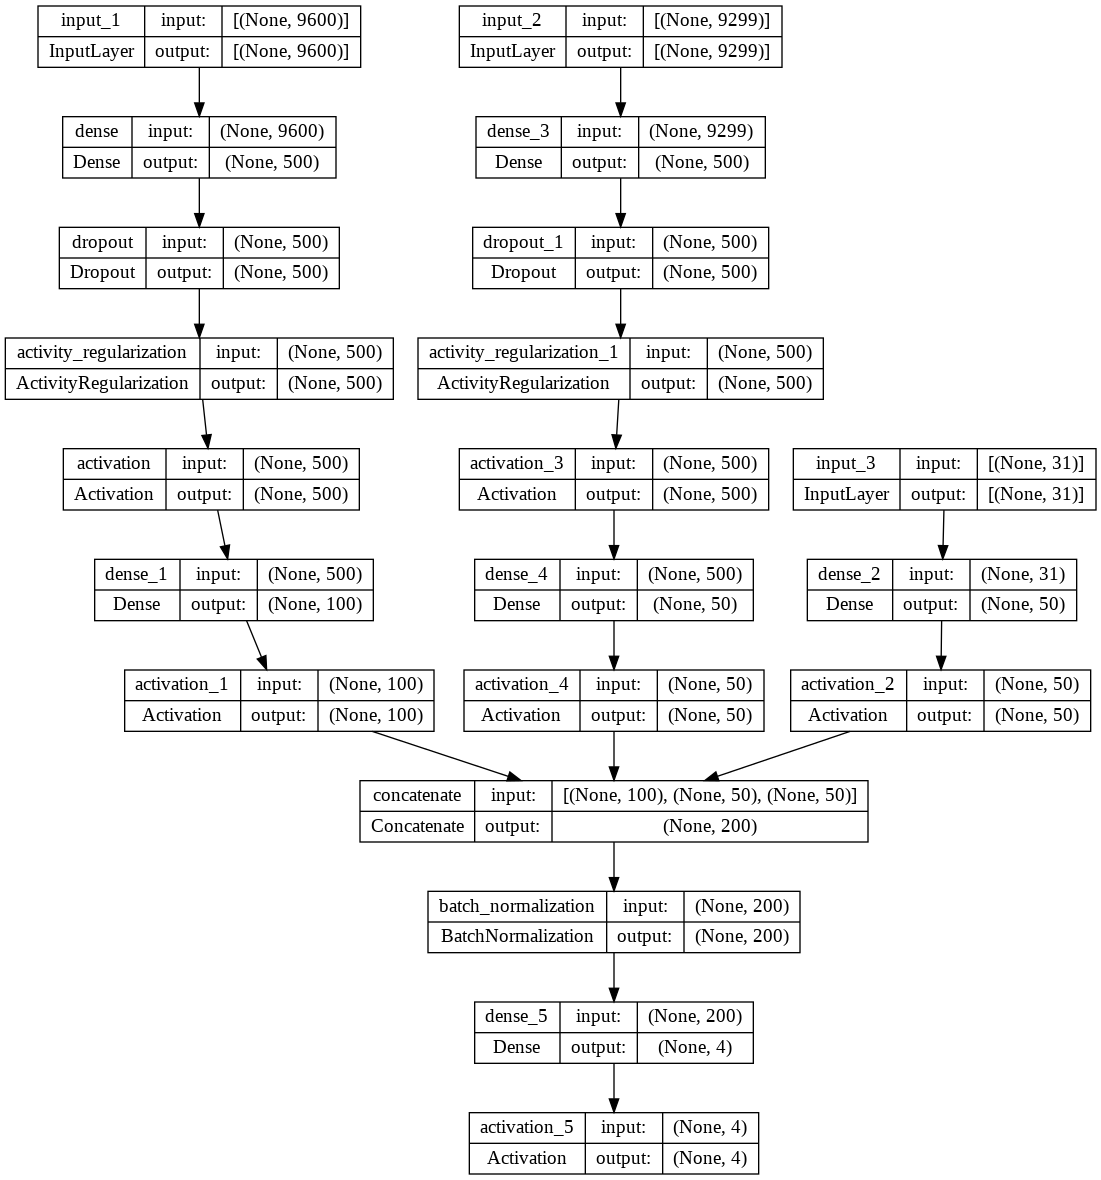

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# train_data = tf.data.Dataset().from_tensor_slices((X_train, y_train))
# train_data = train_data.map(map_func=[neural_embed_model, stastical_features, external_features], num_parrallel_calls=tf.data.AUTOTUNE)
# train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# test_data = tf.data.Dataset().from_tensor_slices((X_test, y_test)).map(map_func=[neural_embed_model, stastical_features, external_features], num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE).cache()

In [ ]:
f1 = neural_embed_model(X_train)
f2 = stastical_features(X_train)
f3 = external_features(X_train)

150
285
74
317
216
93
587
188
185
533
398
237
130
340
252
197
470
207
56
326
242
738
413
4797
278
416
243
469
234
139
621
331
627
634
187
824
107
193
233
65
250
16
260
335
566
309
179
174
485
427
11
294
600
573
135
342
272
2206
366
388
356
182
518
820
267
988
212
346
109
180
628
459
359
296
218
554
251
399
375
486
274
488
818


In [ ]:
history = model.fit([f1, f2, f3],
                    tf.constant(y_train),
                    epochs=10,
                    batch_size=100,
                    validation_split=0.2)

Epoch 1/10
2/2 [==============================] - 2s 271ms/step - loss: 1.5172 - accuracy: 0.2313 - val_loss: 3.7598 - val_accuracy: 0.2500
Epoch 2/10
2/2 [==============================] - 0s 50ms/step - loss: 0.8057 - accuracy: 0.8438 - val_loss: 2.7835 - val_accuracy: 0.2500
Epoch 3/10
2/2 [==============================] - 0s 33ms/step - loss: 0.4703 - accuracy: 0.9500 - val_loss: 2.2550 - val_accuracy: 0.2500
Epoch 4/10
2/2 [==============================] - 0s 33ms/step - loss: 0.2595 - accuracy: 0.9750 - val_loss: 1.9379 - val_accuracy: 0.2750
Epoch 5/10
2/2 [==============================] - 0s 32ms/step - loss: 0.1435 - accuracy: 0.9937 - val_loss: 1.7343 - val_accuracy: 0.3000
Epoch 6/10
2/2 [==============================] - 0s 34ms/step - loss: 0.0917 - accuracy: 1.0000 - val_loss: 1.5845 - val_accuracy: 0.3000
Epoch 7/10
2/2 [==============================] - 0s 35ms/step - loss: 0.0793 - accuracy: 0.9937 - val_loss: 1.4807 - val_accuracy: 0.3250
Epoch 8/10
2/2 [==========

In [ ]:
model.save('/content/drive/MyDrive/Fake News Detection/my_4_by_1000_percent_trained_model')

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-10-15 12:04:48--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-10-15 12:04:48 (78.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import *

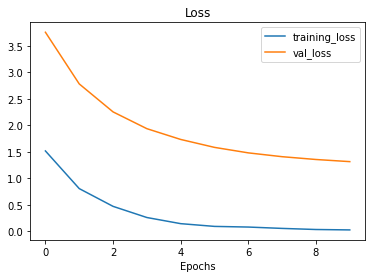

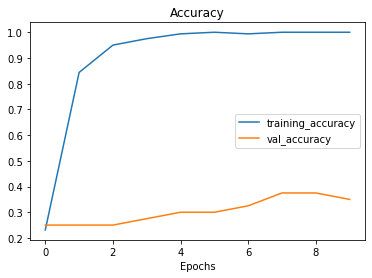

In [ ]:
plot_loss_curves(history)

## Training on full dataset

In [ ]:
df = df_store
df

,Headline,Body_ID,Stance,articleBody
0,Police find mass graves with at least '15 bodi...,712,unrelated,Danny Boyle is directing the untitled film\n\n...
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree,Hundreds of Palestinians were evacuated from t...
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated,30-year-old Moscow resident was hospitalized w...
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated,(Reuters) - A Canadian soldier was shot at the...
4,Spider burrowed through tourist's stomach and ...,1923,disagree,"Fear not arachnophobes, the story of Bunbury's..."
...,...,...,...,...
49967,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,1681,unrelated,(CNN) -- Boko Haram laughed off Nigeria's anno...
49968,Brian Williams slams social media for speculat...,2419,unrelated,Along with unveiling the Apple Watch earlier t...
49969,Mexico Says Missing Students Not Found In Firs...,1156,agree,The bodies found in a mass grave were confirme...
49970,US Lawmaker: Ten ISIS Fighters Have Been Appre...,1012,discuss,Rep. Duncan Hunter (R-CA) told Greta Van Suste...


In [ ]:
X_train = df.drop('Stance', axis=1)
y_train = df["Stance"]
X_train.head(), y_train.head()

(                                            Headline  Body_ID  \
 0  Police find mass graves with at least '15 bodi...      712   
 1  Hundreds of Palestinians flee floods in Gaza a...      158   
 2  Christian Bale passes on role of Steve Jobs, a...      137   
 3  HBO and Apple in Talks for $15/Month Apple TV ...     1034   
 4  Spider burrowed through tourist's stomach and ...     1923   
 
                                          articleBody  
 0  Danny Boyle is directing the untitled film\n\n...  
 1  Hundreds of Palestinians were evacuated from t...  
 2  30-year-old Moscow resident was hospitalized w...  
 3  (Reuters) - A Canadian soldier was shot at the...  
 4  Fear not arachnophobes, the story of Bunbury's...  , 0    unrelated
 1        agree
 2    unrelated
 3    unrelated
 4     disagree
 Name: Stance, dtype: object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(y_train).reshape(-1, 1))
y_train = enc.transform(np.array(y_train).reshape(-1,1)).toarray()
y_train.shape

(49972, 4)

In [ ]:
stff = stastical_features(X_train)
stff.shape

(49972, 10000)

In [ ]:
f1 = neural_embed_model(X_train)
f3 = external_features(X_train)

Loading model parameters...
Compiling encoders...
Loading tables...
Packing up...


In [ ]:
model2 = final_model()

model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer='Adam',
              metrics=['accuracy'])

history2 = model2.fit([f1, stff, f3],
                    tf.constant(y_train),
                    epochs=10,
                    batch_size=100,
                    validation_split=0.2)

In [ ]:
plot_loss_curves(history2)

In [ ]:
model.save('/content/drive/MyDrive/Fake News Detection/full_percent_trained_model')

**For Prediction call me or refer to google.**

```
new_arr = model.predict([arr1, arr2, arr3])

# if model is saved in drive
model = tf.keras.load_model(path_to_the_model)
new_arr = model.predict([arr1, arr2, arr3])
```